<a href="https://colab.research.google.com/github/MBahuddin/Kelompok-9/blob/main/Kelompok_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. HASIL ANALITIK: GERAK JATUH BEBAS
Ketinggian total pohon (H_pohon): 10.0 m
Tinggi Andi (H_andi): 1.6 m
Jarak tempuh kelapa sampai kepala Andi (Y): 8.40 m
Waktu maksimum reaksi Andi (T_reaksi_max): 1.309 s
--------------------------------------------------


<>:86: SyntaxWarning: invalid escape sequence '\ '
<>:86: SyntaxWarning: invalid escape sequence '\ '
/tmp/ipython-input-1811940702.py:86: SyntaxWarning: invalid escape sequence '\ '
  print("\ Animasi Gerak Jatuh Bebas (Gerak Lurus Vertikal)")


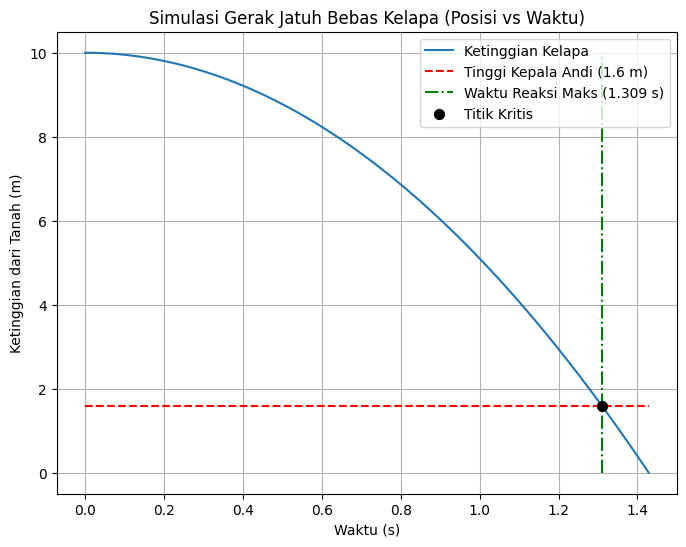

\ Animasi Gerak Jatuh Bebas (Gerak Lurus Vertikal)


In [8]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML


G = 9.8



H_POHON = 10.0
H_ANDI_CM = 160.0


H_ANDI = H_ANDI_CM / 100.0


Y_JARAK_TEMPUH = H_POHON - H_ANDI
T_REAKSI_MAX = np.sqrt((2 * Y_JARAK_TEMPUH) / G)

print("=" * 50)
print("1. HASIL ANALITIK: GERAK JATUH BEBAS")
print("=" * 50)
print(f"Ketinggian total pohon (H_pohon): {H_POHON} m")
print(f"Tinggi Andi (H_andi): {H_ANDI} m")
print(f"Jarak tempuh kelapa sampai kepala Andi (Y): {Y_JARAK_TEMPUH:.2f} m")
print(f"Waktu maksimum reaksi Andi (T_reaksi_max): {T_REAKSI_MAX:.3f} s")
print("-" * 50)


def posisi_kelapa(t):
    """Menghitung ketinggian kelapa dari tanah pada waktu t"""
    y_dari_atas = 0.5 * G * t**2
    y_dari_tanah = H_POHON - y_dari_atas
    return np.maximum(0, y_dari_tanah)


T_TOTAL_JATUH = np.sqrt((2 * H_POHON) / G)


waktu_gjb = np.linspace(0, T_TOTAL_JATUH, 100)
posisi_y_gjb = posisi_kelapa(waktu_gjb)

plt.figure(figsize=(8, 6))
plt.plot(waktu_gjb, posisi_y_gjb, label='Ketinggian Kelapa')
plt.hlines(H_ANDI, 0, T_TOTAL_JATUH, color='r', linestyle='--', label=f'Tinggi Kepala Andi ({H_ANDI} m)')
plt.vlines(T_REAKSI_MAX, 0, H_POHON, color='g', linestyle='-.', label=f'Waktu Reaksi Maks ({T_REAKSI_MAX:.3f} s)')
plt.scatter(T_REAKSI_MAX, H_ANDI, color='black', s=50, zorder=5, label='Titik Kritis')

plt.title('Simulasi Gerak Jatuh Bebas Kelapa (Posisi vs Waktu)')
plt.xlabel('Waktu (s)')
plt.ylabel('Ketinggian dari Tanah (m)')
plt.grid(True)
plt.legend()
plt.show()


fig_gjb, ax_gjb = plt.subplots(figsize=(4, 8))

ax_gjb.set_xlim(-0.5, 0.5)
ax_gjb.set_ylim(0, H_POHON + 1)

ax_gjb.set_xticks([])
ax_gjb.set_xlabel("Posisi Horizontal (dianggap tetap)")
ax_gjb.set_ylabel("Ketinggian (m)")
ax_gjb.set_title("Animasi Gerak Jatuh Bebas")

line_kelapa, = ax_gjb.plot(0, H_POHON, 'o', color='brown', markersize=15, label='Kelapa')
ax_gjb.hlines(H_ANDI, -0.5, 0.5, color='red', linestyle='--', label='Kepala Andi')
ax_gjb.text(0.1, H_ANDI, 'Andi', color='red', fontsize=12)

def update_gjb(frame):
    t = frame * (T_TOTAL_JATUH / 50)
    y = posisi_kelapa(t)


    line_kelapa.set_data(np.array([0]), np.array([y]))

    return line_kelapa,


ani_gjb = FuncAnimation(fig_gjb, update_gjb, frames=51, blit=True, interval=50, repeat=False)


plt.close(fig_gjb)
print("\ Animasi Gerak Jatuh Bebas (Gerak Lurus Vertikal)")
HTML(ani_gjb.to_jshtml())

<>:84: SyntaxWarning: invalid escape sequence '\c'
<>:84: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipython-input-2980716467.py:84: SyntaxWarning: invalid escape sequence '\c'
  plt.title('Lintasan Gerak Parabola (V0=10 m/s, $\\theta=60^\circ$)')


2. HASIL ANALITIK: GERAK PARABOLA
Kecepatan awal (V0): 10.0 m/s
Sudut elevasi (θ): 60.0°
--------------------------------------------------
Ketinggian maksimum (H_max): 3.827 m
Target ketinggian (2/3 H_max): 2.551 m
Waktu mencapai 2/3 H_max (T_1/T_2): 0.373 s / 1.394 s
--------------------------------------------------
Jarak maksimum (X_max): 8.837 m
Target jarak (2/3 X_max): 5.891 m
Waktu mencapai 2/3 X_max (T_X): 1.178 s


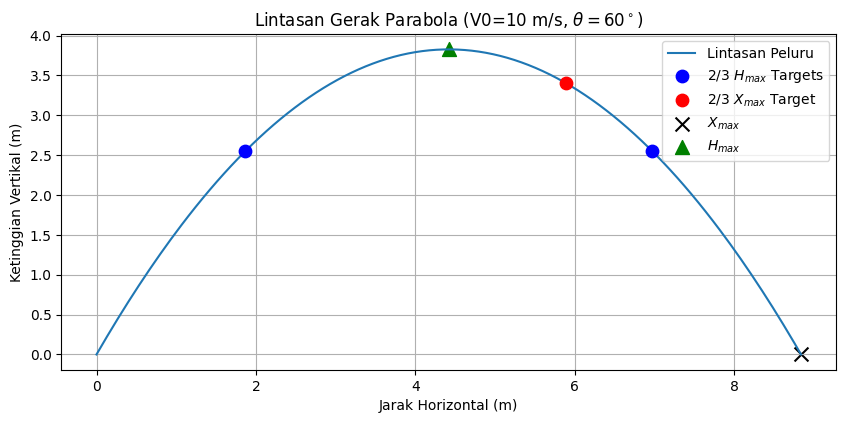


Menampilkan Animasi Gerak Parabola...


In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML

G = 9.8


V0 = 10.0
THETA_DEG = 60.0


THETA_RAD = np.deg2rad(THETA_DEG)


V0X = V0 * np.cos(THETA_RAD)
V0Y = V0 * np.sin(THETA_RAD)



T_TOTAL = (2 * V0Y) / G


H_MAX = (V0Y**2) / (2 * G)
Y_TARGET = (2/3) * H_MAX


X_MAX = (V0**2 * np.sin(2 * THETA_RAD)) / G
X_TARGET = (2/3) * X_MAX


a_y = 0.5 * G
b_y = -V0Y
c_y = Y_TARGET
Disk_y = b_y**2 - 4 * a_y * c_y

if Disk_y >= 0:
    T_1_Y = (-b_y - np.sqrt(Disk_y)) / (2 * a_y)
    T_2_Y = (-b_y + np.sqrt(Disk_y)) / (2 * a_y)
else:
    T_1_Y, T_2_Y = np.nan, np.nan

T_X = X_TARGET / V0X

print("=" * 50)
print("2. HASIL ANALITIK: GERAK PARABOLA")
print("=" * 50)
print(f"Kecepatan awal (V0): {V0} m/s")
print(f"Sudut elevasi (θ): {THETA_DEG}°")
print("-" * 50)
print(f"Ketinggian maksimum (H_max): {H_MAX:.3f} m")
print(f"Target ketinggian (2/3 H_max): {Y_TARGET:.3f} m")
print(f"Waktu mencapai 2/3 H_max (T_1/T_2): {T_1_Y:.3f} s / {T_2_Y:.3f} s")
print("-" * 50)
print(f"Jarak maksimum (X_max): {X_MAX:.3f} m")
print(f"Target jarak (2/3 X_max): {X_TARGET:.3f} m")
print(f"Waktu mencapai 2/3 X_max (T_X): {T_X:.3f} s")
print("=" * 50)


def posisi_parabola(t):
    """Menghitung posisi (x, y) pada waktu t"""
    x = V0X * t
    y = V0Y * t - 0.5 * G * t**2

    return x, np.maximum(0, y)


waktu_parabola = np.linspace(0, T_TOTAL, 200)
posisi_x_parabola, posisi_y_parabola = posisi_parabola(waktu_parabola)


X_at_Y_target_1, _ = posisi_parabola(T_1_Y)
X_at_Y_target_2, _ = posisi_parabola(T_2_Y)
X_at_X_target, Y_at_X_target = posisi_parabola(T_X)

plt.figure(figsize=(10, 6))
plt.plot(posisi_x_parabola, posisi_y_parabola, label='Lintasan Peluru')
plt.scatter([X_at_Y_target_1, X_at_Y_target_2], [Y_TARGET, Y_TARGET], color='blue', s=80, zorder=5, label=r'$2/3\ H_{max}$ Targets')
plt.scatter(X_at_X_target, Y_at_X_target, color='red', s=80, zorder=5, label=r'$2/3\ X_{max}$ Target')
plt.scatter(X_MAX, 0, color='black', marker='x', label=r'$X_{max}$', s=100)
plt.scatter(posisi_parabola(T_TOTAL/2)[0], H_MAX, color='green', marker='^', label=r'$H_{max}$', s=100)

plt.title('Lintasan Gerak Parabola (V0=10 m/s, $\\theta=60^\circ$)')
plt.xlabel('Jarak Horizontal (m)')
plt.ylabel('Ketinggian Vertikal (m)')
plt.grid(True)
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.show()



fig_parabola, ax_parabola = plt.subplots(figsize=(10, 6))
ax_parabola.set_xlim(0, X_MAX * 1.1)
ax_parabola.set_ylim(0, H_MAX * 1.2)
ax_parabola.set_xlabel("Jarak Horizontal (m)")
ax_parabola.set_ylabel("Ketinggian Vertikal (m)")
ax_parabola.set_title("Animasi Gerak Parabola")

line_peluru, = ax_parabola.plot([], [], 'o', color='red', markersize=8, label='Peluru')
ax_parabola.plot(posisi_x_parabola, posisi_y_parabola, 'k--', alpha=0.3, label='Lintasan')


ax_parabola.scatter([X_at_Y_target_1, X_at_Y_target_2], [Y_TARGET, Y_TARGET], color='blue', marker='x', s=100)
ax_parabola.scatter(X_at_X_target, Y_at_X_target, color='red', marker='x', s=100)

def update_parabola(frame):

    t = frame * (T_TOTAL / 100)
    x, y = posisi_parabola(t)

    line_peluru.set_data(np.array([x]), np.array([y]))
    return line_peluru,


ani_parabola = FuncAnimation(fig_parabola, update_parabola, frames=101, blit=True, interval=50, repeat=False)


plt.close(fig_parabola)
print("\nMenampilkan Animasi Gerak Parabola...")


HTML(ani_parabola.to_jshtml())